In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sensors import *
from functools import partial

In [2]:
# Отношение расстояния между датчиками к длине волны
dist_ratio = 0.5

In [3]:
Num_sensors1 = 5
Num_emitters1 = 1
sample_size1 = 100
theta1 = [0.5] # Направление прибытия (DOA) в радианах
GS_1 = np.array([[0.7]]) # Ковариация сигнала
GN_1 = 4.1*np.eye(5, dtype=np.float64) # Ковариация шума
A1 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors1).reshape(-1,1) * np.sin(theta1).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s1 = CN(Num_emitters1, sample_size1, GS_1)
n1 = CN(Num_sensors1, sample_size1, GN_1)
X1 = (A1 @ s1.T + n1.T).T

In [4]:
est_theta1, neglhd_1, K1, mu1 = multi_start(10, X1, GS_1, GN_1, max_iter=50, eps=1e-6)

0-th start
Iteration=1, theta_new=[1.37722981], -likelihood = -76.35315
Iteration=2, theta_new=[1.40305287], -likelihood = -76.56356
Iteration=3, theta_new=[1.43196343], -likelihood = -76.75616
Iteration=4, theta_new=[1.46643404], -likelihood = -76.93013
Iteration=5, theta_new=[1.62560801], -likelihood = -77.08581
Iteration=6, theta_new=[1.57075961], -likelihood = -77.20878
norm=0.0
Iteration=7, theta_new=[1.57075961], -likelihood = -77.23370
1-th start
Iteration=1, theta_new=[-2.47406496], -likelihood = -72.90939
Iteration=2, theta_new=[-2.48505812], -likelihood = -73.54188
Iteration=3, theta_new=[-2.49610012], -likelihood = -74.19954
Iteration=4, theta_new=[-2.50700837], -likelihood = -74.87133
Iteration=5, theta_new=[-2.51771947], -likelihood = -75.53796
Iteration=6, theta_new=[-2.52804605], -likelihood = -76.18752
Iteration=7, theta_new=[-2.53798295], -likelihood = -76.80168
Iteration=8, theta_new=[-2.54740125], -likelihood = -77.37485
Iteration=9, theta_new=[-2.55623257], -likelih

In [5]:
print(f"Погрешность в смысле разности углов: {np.abs(est_theta1-theta1)}.\nПогрешность в смысле разности синусов углов {np.abs(np.sin(est_theta1)-np.sin(theta1))}.")

Погрешность в смысле разности углов: [0.01179539].
Погрешность в смысле разности синусов углов [0.01031784].


In [6]:
Num_sensors2 = 5
Num_emitters2 = 2
sample_size2 = 100
theta2 = np.array([0.34906585, 1.22173048]) # Направление прибытия (DOA) в радианах
GS_2 = np.array([[2,0],[0,3]]) # Ковариация сигнала
GN_2 = 0.1*np.eye(5, dtype=np.float64) # Ковариация шума
A2 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors2).reshape(-1,1) * np.sin(theta2).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s2 = CN(Num_emitters2, sample_size2, GS_2)
n2 = CN(Num_sensors2, sample_size2, GN_2)
X2 = (A2 @ s2.T + n2.T).T

In [7]:
est_theta2, neglhd_2, K2, mu2 = multi_start(10, X2, GS_2, GN_2, max_iter=50, eps=1e-6)

0-th start
Iteration=1, theta_new=[ 1.91587204 -2.84884113], -likelihood = -17233.64267
Iteration=2, theta_new=[ 1.91664419 -2.85768459], -likelihood = -17247.16967
Iteration=3, theta_new=[ 1.91722631 -2.8622722 ], -likelihood = -17250.90313
Iteration=4, theta_new=[ 1.91769035 -2.86467271], -likelihood = -17251.93019
Iteration=5, theta_new=[ 1.91800882 -2.86592984], -likelihood = -17252.21939
Iteration=6, theta_new=[ 1.91824294 -2.86653404], -likelihood = -17252.30069
Iteration=7, theta_new=[ 1.91841784 -2.86688272], -likelihood = -17252.32332
Iteration=8, theta_new=[ 1.91854232 -2.86706364], -likelihood = -17252.33088
Iteration=9, theta_new=[ 1.91863322 -2.86716719], -likelihood = -17252.33313
Iteration=10, theta_new=[ 1.91868653 -2.8671874 ], -likelihood = -17252.33381
Iteration=11, theta_new=[ 1.91872528 -2.86719922], -likelihood = -17252.33400
Iteration=12, theta_new=[ 1.91876415 -2.86723222], -likelihood = -17252.33405
Iteration=13, theta_new=[ 1.9188049  -2.86722076], -likelihood

In [8]:
print(f"Погрешность в смысле разности углов: {np.abs(est_theta2-theta2)}.\nПогрешность в смысле разности синусов углов {np.abs(np.sin(est_theta2)-np.sin(theta2))}.")

Погрешность в смысле разности углов: [0.00304006 0.69659406].
Погрешность в смысле разности синусов углов [0.0028583  0.00052479].


## Теперь имеет смысл определить примерный вид функции, оптимизируемой на М-шаге:

In [9]:
W1, W2 = goal_function(X1, GS_1, GN_2, 50)

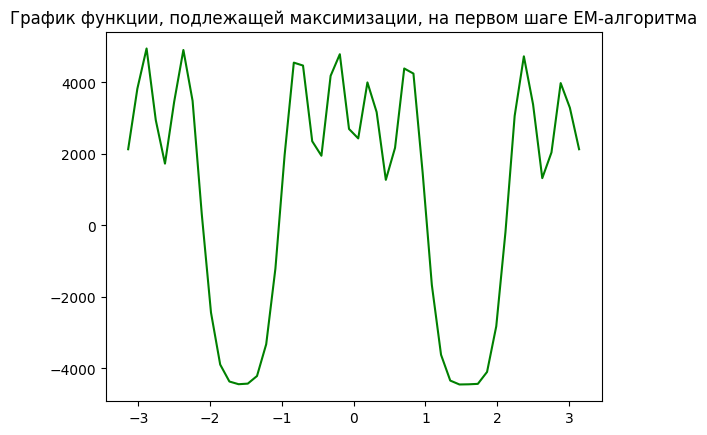

In [10]:
plt.title("График функции, подлежащей максимизации, на первом шаге ЕМ-алгоритма")
plt.plot(W1, W2.real, color='green')

In [11]:
# Переведем оценку угла прибытия в градусы
est_theta1_degree = est_theta1[0]*180/np.pi

In [12]:
est_theta1_degree

29.323716052117142

Ввиду того, что синус симметричен относительно $\pi/2$, а синус используется в управляющих векторах, происходит такое искажение оценки, т.е. она симметрична относительно точки в окрестности истинного DOA.

In [13]:
if est_theta1_degree > 90:
    est_theta1_degree = 90-(est_theta1_degree-90)

In [14]:
est_theta1_degree

29.323716052117142

In [15]:
# Истинное DOA в градусах
theta1_degree = theta1[0]*180/np.pi

In [16]:
theta1_degree

28.64788975654116

Теперь проведем сравнение с **CAPON**:

In [17]:
R = space_covariance_matrix(X1)
angles = np.linspace(-1*np.pi, np.pi, 1000)
Powers = []
for angle in angles:
    a = steering_vector(dist_ratio, angle, 5)
    Powers.append(capon_func(a,R).real)

In [18]:
angles[np.argmax(Powers)]*180/np.pi

29.369369369369345

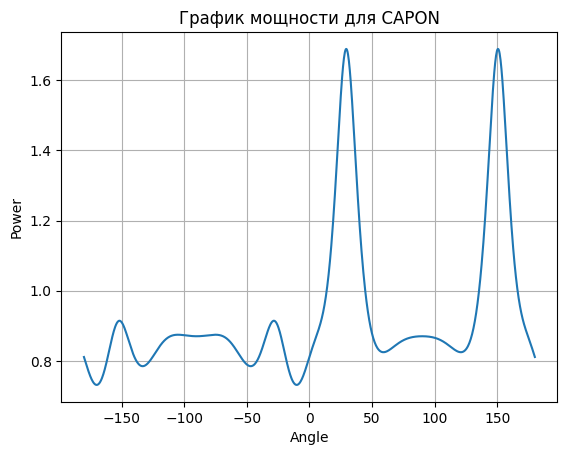

In [19]:
plt.title("График мощности для CAPON")
plt.plot(angles*180/np.pi, Powers) 
plt.xlabel("Angle")
plt.ylabel("Power")
plt.grid()
plt.show()

In [20]:
angles_near = np.linspace(0.5-0.1, 0.5+0.1, 100)
Powers_near = []
for angle in angles_near:
    a = steering_vector(dist_ratio, angle, 5)
    Powers_near.append(capon_func(a,R).real)

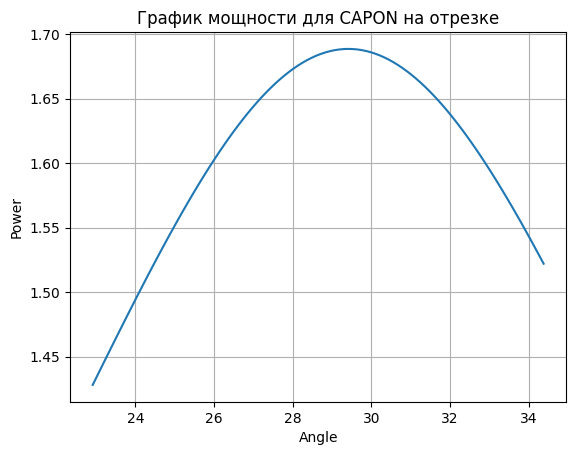

In [21]:
plt.title("График мощности для CAPON на отрезке")
plt.plot(angles_near*180/np.pi, Powers_near) 
plt.xlabel("Angle")
plt.ylabel("Power")
plt.grid()
plt.show()

# Оценка **CAPON** в градусах

In [22]:
capon_theta1_degree = angles_near[np.argmax(Powers_near)]*180/np.pi

In [23]:
capon_theta1_degree

29.40025857843012

In [24]:
# ЕМ-оценка
est_theta1_degree

29.323716052117142

In [25]:
# Истинное значение
theta1_degree

28.64788975654116